In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/damien/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Hosts file

Print out the hosts file, and attempt to geolocate the IP address. Not particularly successful, but could give information on other log files.

In [2]:
# These are the imports that are most likely to fail, so put
# it in as a separate cell.
import geocoder, socket

In [3]:
hosts_df = pd.read_csv('../log_output/hosts.txt', names=['host','visits'])
hosts_df

,host,visits
0,piweba3y.prodigy.com,22309
1,piweba4y.prodigy.com,14903
2,piweba1y.prodigy.com,12876
3,siltb10.orl.mmc.com,10578
4,alyssa.prodigy.com,10184
5,edams.ksc.nasa.gov,9095
6,piweba2y.prodigy.com,7961
7,163.206.89.4,6520
8,www-d3.proxy.aol.com,6299
9,vagrant.vf.mmc.com,6096


In [4]:
# Let us see if geocoder can locate the hosts for us
def get_ip(hostname):
    try:
        return socket.gethostbyname(hostname)
    except:
        return '0.0.0.0'

hosts_df['ip']  = hosts_df['host'].apply(lambda x: get_ip(x) )
hosts_df['geo_obj'] = hosts_df['ip'].apply(lambda x: geocoder.ip(x))
hosts_df['city'] = hosts_df['geo_obj'].apply(lambda x: x.city)
hosts_df['state'] = hosts_df['geo_obj'].apply(lambda x: x.state)
hosts_df['latlng'] = hosts_df['geo_obj'].apply(lambda x:x.latlng)
hosts_df.drop('geo_obj', axis = 1, inplace = True)
hosts_df

,host,visits,ip,city,state,latlng
0,piweba3y.prodigy.com,22309,0.0.0.0,None,None,[]
1,piweba4y.prodigy.com,14903,0.0.0.0,None,None,[]
2,piweba1y.prodigy.com,12876,0.0.0.0,None,None,[]
3,siltb10.orl.mmc.com,10578,0.0.0.0,None,None,[]
4,alyssa.prodigy.com,10184,0.0.0.0,None,None,[]
5,edams.ksc.nasa.gov,9095,163.206.118.106,Cleveland,Ohio,"[41.4352, -81.8108]"
6,piweba2y.prodigy.com,7961,0.0.0.0,None,None,[]
7,163.206.89.4,6520,163.206.89.4,Cleveland,Ohio,"[41.4352, -81.8108]"
8,www-d3.proxy.aol.com,6299,0.0.0.0,None,None,[]
9,vagrant.vf.mmc.com,6096,0.0.0.0,None,None,[]


# Resources

Just print out the resources file. No other information to collate.

In [5]:
pd.read_csv('../log_output/resources.txt', names=['Resource'])

,Resource
0,/
1,/images/NASA-logosmall.gif
2,/images/KSC-logosmall.gif
3,/images/USA-logosmall.gif
4,/images/WORLD-logosmall.gif
5,/images/MOSAIC-logosmall.gif
6,/images/ksclogo-medium.gif
7,/images/launch-logo.gif
8,/ksc.html
9,/shuttle/countdown/


# Time information

Gives the information about the time. We will present the hours, the disjoint hours, and most popular time of day. Starting with the time of day, we see that peak times are early afternoon.

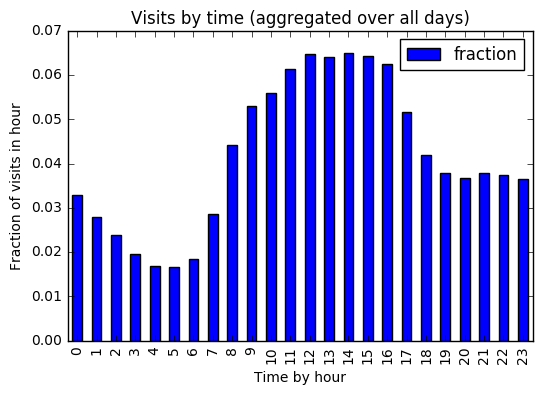

In [6]:
%matplotlib inline
tod = pd.read_csv('../log_output/time_of_day.txt', names = ['time', 'visits'])
tod['fraction'] = tod['visits'] / sum(tod['visits'])
ax = tod[['time','fraction']].plot(kind="bar", title="Visits by time (aggregated over all days)");
ax.set_xlabel("Time by hour")
ax.set_ylabel("Fraction of visits in hour")
ax;

Here are the most popular times asked for by the assignment. It allows for overlaps. All we really get from this is that the period around 9:00 on 13th of July 1995 was very popular.

In [7]:
pop_times1 = pd.read_csv('../log_output/hours.txt', names=['timestamp','visits'])
pop_times2 = pd.read_csv('../log_output/disjoint_hours.txt', names=['timestamp','visits'])

pop_times1

,timestamp,visits
0,13/Jul/1995:08:59:33 -0400,35040
1,13/Jul/1995:08:59:40 -0400,35033
2,13/Jul/1995:08:59:39 -0400,35033
3,13/Jul/1995:08:59:38 -0400,35028
4,13/Jul/1995:08:59:42 -0400,35025
5,13/Jul/1995:08:59:35 -0400,35023
6,13/Jul/1995:08:59:34 -0400,35022
7,13/Jul/1995:08:59:31 -0400,35021
8,13/Jul/1995:08:59:41 -0400,35020
9,13/Jul/1995:08:59:36 -0400,35015


The `disjoint_hours` gives the most popular times, not allowing for overlaps.  This gives us a better idea of what times the server is most busy (instead of crowding around one time). 

We see that the 13th was reasonably busy all day (from 9 am to 1 pm). This was the time that  **Discovery** last launched.

In [8]:
pop_times2

,timestamp,visits
0,13/Jul/1995:09:59:34 -0400,35040
1,13/Jul/1995:08:59:19 -0400,26642
2,13/Jul/1995:10:59:36 -0400,24057
3,13/Jul/1995:11:59:48 -0400,22819
4,13/Jul/1995:12:59:57 -0400,19982
5,05/Jul/1995:15:00:38 -0400,18998
6,13/Jul/1995:14:14:51 -0400,18697
7,13/Jul/1995:16:38:22 -0400,18071
8,05/Jul/1995:16:06:39 -0400,16077


# Blocked list

In [9]:
block = {}
with open('../log_output/blocked.txt') as f:
    for line in f:
        host = line.split()[0]
        block[host] = block.get(host,0) + 1
        
block_df = pd.DataFrame( block.items(), columns = ['host', 'times_blacklisted'])
block_df.sort_values(by=['times_blacklisted'], ascending = False, inplace = True)
block_df[:6]

,host,times_blacklisted
677,disarray.demon.co.uk,1521
6778,163.205.1.45,1018
4807,163.205.156.16,1000
4861,proxy0.research.att.com,877
1939,arctic.nad.northrop.com,746
6073,vagrant.vf.mmc.com,716


In [10]:
# try geocoding again
block_df = block_df[:50]
block_df['ip']          = block_df['host'].apply(lambda x: get_ip(x))
block_df['geocode_obj'] = block_df['ip'].apply(lambda x: geocoder.ip(x))
block_df['city'] = block_df['geocode_obj'].apply(lambda x: x.city)
block_df['state']= block_df['geocode_obj'].apply(lambda x: x.state)
block_df['latlng']=block_df['geocode_obj'].apply(lambda x: x.latlng)
block_df.drop('geocode_obj', axis = 1, inplace = True)

In [11]:
block_df

,host,times_blacklisted,ip,city,state,latlng
677,disarray.demon.co.uk,1521,193.195.0.162,,,"[51.4964, -0.1224]"
6778,163.205.1.45,1018,163.205.1.45,Cleveland,Ohio,"[41.4352, -81.8108]"
4807,163.205.156.16,1000,163.205.156.16,Cleveland,Ohio,"[41.4352, -81.8108]"
4861,proxy0.research.att.com,877,0.0.0.0,None,None,[]
1939,arctic.nad.northrop.com,746,0.0.0.0,None,None,[]
6073,vagrant.vf.mmc.com,716,0.0.0.0,None,None,[]
1123,163.205.156.61,565,163.205.156.61,Cleveland,Ohio,"[41.4352, -81.8108]"
5383,piweba3y.prodigy.com,488,0.0.0.0,None,None,[]
2104,gatekeeper.mitre.org,478,0.0.0.0,None,None,[]
4126,interlock.turner.com,372,0.0.0.0,None,None,[]


Drop the locations that we couldn't find

In [23]:
block_df[pd.notnull(block_df['city'])]

,host,times_blacklisted,ip,city,state,latlng
677,disarray.demon.co.uk,1521,193.195.0.162,,,"[51.4964, -0.1224]"
6778,163.205.1.45,1018,163.205.1.45,Cleveland,Ohio,"[41.4352, -81.8108]"
4807,163.205.156.16,1000,163.205.156.16,Cleveland,Ohio,"[41.4352, -81.8108]"
1123,163.205.156.61,565,163.205.156.61,Cleveland,Ohio,"[41.4352, -81.8108]"
180,199.201.186.105,340,199.201.186.105,Biloxi,Mississippi,"[30.403, -88.966]"
1194,163.205.12.166,327,163.205.12.166,Cleveland,Ohio,"[41.4352, -81.8108]"
4922,128.159.105.240,290,128.159.105.240,Cleveland,Ohio,"[41.4352, -81.8108]"
181,199.201.186.103,265,199.201.186.103,Biloxi,Mississippi,"[30.403, -88.966]"
5762,163.206.104.34,261,163.206.104.34,Cleveland,Ohio,"[41.4352, -81.8108]"
30,ucicl.eng.uci.edu,234,128.200.20.151,Irvine,California,"[33.6403, -117.7694]"
